In [1]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path
root_dir = Path.cwd().parents[1]
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))
print(root_dir)

/home/wollex/Data/Science/WolfGroup/DarkMatter/Programme


In [2]:
import numpy as np
from inference.network import Network

In [ ]:
net = Network(eps=0.5,eta=0.7)
net.register_population(nu_bar=2., alpha_0=0.02, J0=-1.)
net.populations[0].register_synapse(tau_I=0.005, r_I=1., tau_norm=1.)
net.register_population(1,nu_bar=0.5, alpha_0=0.01, J0=1.)
net.populations[1].register_synapse(tau_I=0.001, r_I=1., tau_norm=1.)

array([[-0.00866025,  0.005     ],
       [-0.0093675 ,  0.0035    ]])

In [ ]:
net.set_weights()
net.calculate_sigma_V()

In [ ]:
net.populations[0].nu_bar = 0.5
net.populations[1].nu_bar = 2.
net.solve_selfcon()
net.print_current_state()

Network with 2 populations:
  eps: 0.5
  eta: 0.7
  weights: [[-0.00866025  0.005     ]
 [-0.0093675   0.0035    ]]

Population 0:
  nu_bar: 0.5
  alpha_0: 0.02
  q: 0.5768873295249546

  alpha: 0.023955765802149684
  sigma_V: 0.06908492797077576
  nu_max: 38.361042373066965

  tau_M: 0.01
  Psi_0: 0.0
  kappa: 1.0
  J0: -1.0
  Synapse 0:
    tau_I: 0.005
    r_I: 1.0
    tau_norm: 1.0
Population 1:
  nu_bar: 2.0
  alpha_0: 0.01
  q: 5.224486618122905

  alpha: 0.014649976936426225
  sigma_V: 0.06355026643245773
  nu_max: 32.64021152186275

  tau_M: 0.01
  Psi_0: 0.0
  kappa: 1.0
  J0: 1.0
  Synapse 0:
    tau_I: 0.001
    r_I: 1.0
    tau_norm: 1.0


In [66]:
n_steps = 101
gamma = np.full((n_steps,n_steps),np.nan)
chi = np.full((n_steps,n_steps),np.nan)
delta = np.full((n_steps,n_steps),np.nan)

eps_arr = np.linspace(0.,np.sqrt(1/2.),n_steps)
eta_arr = np.linspace(0.,1.,n_steps)
for i,eps in enumerate(eps_arr):
    net.eps = eps
    for j,eta in enumerate(eta_arr):
        net.eta = eta
        net.set_weights()
        net.calculate_sigma_V()
        if net.solve_selfcon():
            # net.populations[0].calculate_distribution_parameters()

            gamma[i,j] = net.populations[0].gamma
            delta[i,j] = net.populations[0].delta
            chi[i,j] = net.populations[0].chi

In [58]:
gamma

array([[2.42664662, 2.42664662, 2.42664662, ..., 2.42664662, 2.42664662,
        2.42664662],
       [2.42663206, 2.42663206, 2.42663206, ..., 2.42663206, 2.42663206,
        2.42663206],
       [2.42658839, 2.42658839, 2.42658839, ..., 2.42658839, 2.42658839,
        2.42658839],
       ...,
       [2.29198567, 2.29198558, 2.2919853 , ..., 2.29260044, 2.29265964,
        2.29272231],
       [2.28943232, 2.28943222, 2.28943193, ..., 2.29013329, 2.29019875,
        2.29026806],
       [2.28686934, 2.28686924, 2.28686893, ..., 2.28766528, 2.28773761,
        2.28781422]])

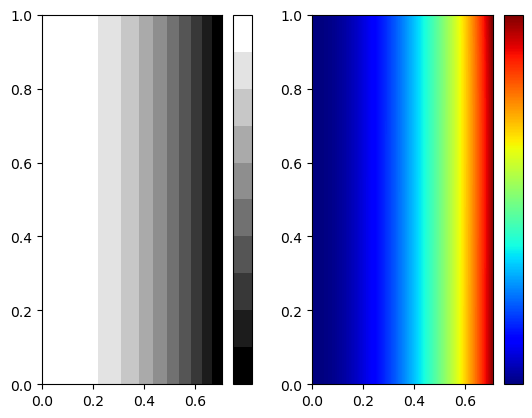

In [67]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

fig = plt.figure()
ax_gamma = fig.add_subplot(121)
ax_chi = fig.add_subplot(122)

cmap = ListedColormap([plt.cm.gray(i/9) for i in range(10)])
norm = BoundaryNorm(np.linspace(0, 1, 11), cmap.N)

img_gamma = ax_gamma.imshow((gamma**2).T, origin='lower', aspect='auto', extent=(*eps_arr[[0,-1]],*eta_arr[[0,-1]]), cmap=cmap)#, norm=norm)
# img_chi = ax_chi.imshow(chi.T, origin='lower', aspect='auto', extent=(*eps_arr[[0,-1]],*eta_arr[[0,-1]]), cmap="jet",vmin=0.,vmax=4.)#, norm=norm)

img_delta = ax_chi.imshow(delta.T, origin='lower', aspect='auto', extent=(*eps_arr[[0,-1]],*eta_arr[[0,-1]]), cmap="jet")#, norm=norm)

plt.colorbar(img_gamma, ax=ax_gamma, ticks=np.linspace(0, 1, 11))
# plt.colorbar(img_chi, ax=ax_chi, ticks=np.linspace(0, 4, 11))
plt.colorbar(img_delta, ax=ax_chi, ticks=np.linspace(0, 4, 11))

In [42]:
from darkMatter import darkMatter
from general_utils.parameters import set_options, get_J, get_var_V


In [46]:
net = Network(eps=0.5,eta=0.7)
net.register_population(nu_bar=2., alpha_0=0.02, J0=-1.)
net.populations[0].register_synapse(tau_I=0.005, r_I=1., tau_norm=1.)
net.register_population(1,nu_bar=0.5, alpha_0=0.01, J0=1.)
net.populations[1].register_synapse(tau_I=0.001, r_I=1., tau_norm=1.)
net.set_weights()

In [49]:
options = set_options(L=1, nI=1, nE=1)

for key in ["eps","eta"]:
    options[key] = getattr(net,key)

for key in ["nu_bar","alpha_0","J0"]:
    options[key] = []
    for p,pop in enumerate(net.populations):
        options[key].append(getattr(pop,key))

for key in ["tau_I","r_I","tau_norm"]:
    options[key] = []
    for p,pop in enumerate(net.populations):
        for s,syn in enumerate(pop.synapses):
            
            options[key].append(getattr(syn,key))

options["tau_n"] = 0.
options["rateWnt"] = options["nu_bar"]
# net.print_current_state()
# options


In [ ]:
options["simulation"] = {
    "eps": [0.0, np.sqrt(1.0 / 2)],
    "eta": [0.6],
    "sim_prim": [0, -1, 0],
    "sim_sec": [0, -1, 0],
}
